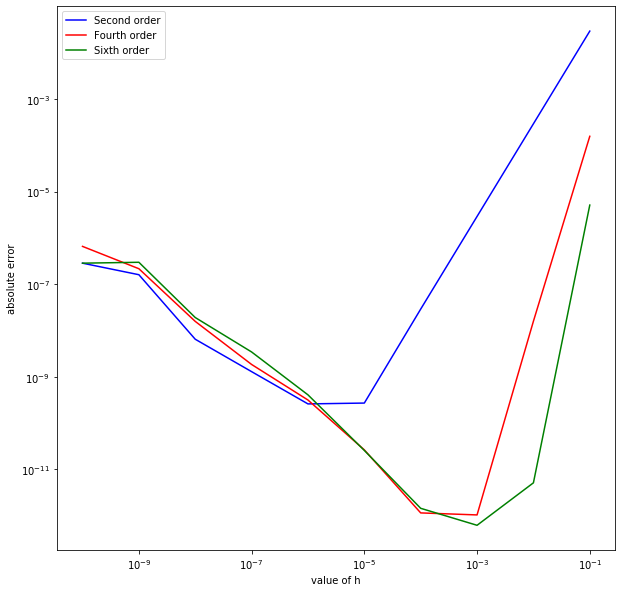

[5.098989e-06, 5e-12, 1e-12, 1e-12, 2.6e-11, 4.08e-10, 3.44e-09, 1.906e-08, 2.96983e-07, 2.84033e-07]


In [140]:
import matplotlib.pyplot as plt
from matplotlib import figure

#define the function
def f(x):
    return exp(x)*cos(2*x)

#define the hand calculated derivative
def f_deriv(x):
    return exp(x)*(cos(2*x) - 2*sin(2*x)) 

#params:
# f: function
# x_0: point to evaluate at
# order: order of the centered difference formula
# h: step size -> 1e-h

def CenteredDifferenceDeriv(f, x_0, order, h):
    #decide the order and use the corresponding formula
    if (order == 2):  
        return (f(x_0 + h) - f(x_0 - h)) / (2*h)
    elif (order == 4):
        return (f(x_0 - 2*h) - 8*f(x_0 - h) + 8*f(x_0 + h) - f(x_0 + 2*h)) / (12*h)
    elif (order == 6):
        return (-f(x_0 - 3*h) + 9*f(x_0 - 2*h) - 45*f(x_0 - h) + 45*f(x_0 + h) - 9*f(x_0 + 2*h) + f(x_0 + 3*h)) / (60*h)
    else:
        print("Invalid input!")
        
#initializing lists to hold h and error values, (too lazy to hardcode h values)
#err[0] -> second order, err[1] -> fourth order, err[2] -> sixth order
err_list = [[], [], []]
h_list = []
init_hlist = true

#call the function for orders 2, 4, 6 and h values from 1e-1 to 1e-10
for order in range(2, 8, 2):
    
    #stop pushing h values since they will be the same thing over and over
    if(order == 4):
        init_hlist = false
        
    for h in range(1, 11):
        
        if(init_hlist):
            h_list.append(10**(-h))
        
        #storing the value in a temporary variable to calculate the error
        temp = CenteredDifferenceDeriv(f, 1, order, 10**(-h))
        
        #calculate the error and push to the list
        err_list[int((order/2)) - 1].append(abs(float(temp - f_deriv(1))))

#setting figure size
plt.figure(figsize=(10,10))

#plotting for every error list
plt.plot(h_list, err_list[0], "-b", label="Second order")
plt.plot(h_list, err_list[1], "-r", label="Fourth order")
plt.plot(h_list, err_list[2], "-g", label="Sixth order")

#changing the x and y scalings to logarithmic
plt.xscale("log")
plt.yscale("log")

#setting the axis labels
plt.xlabel("value of h")
plt.ylabel("absolute error")

#adding the legend to the top left corner and showing the plot
plt.legend(loc="upper left")
plt.show()

##print(list(map(lambda x : round(x, 12), err_list[2])))